In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Min and max values for labels and label array dimensions: [0] [4] (680900, 1)


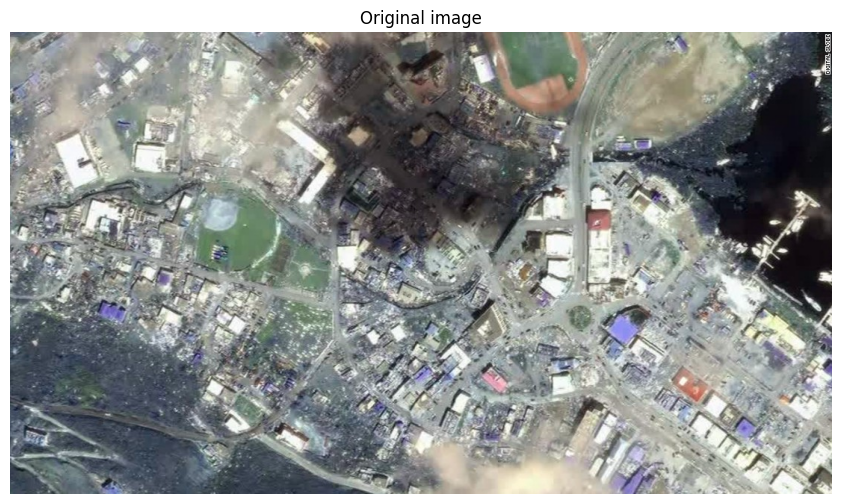

In [2]:

img=cv2.imread('irma_devastation.jpg',1)
plt.figure(figsize=(12,6))
plt.imshow(img)
plt.axis('off')
plt.title("Original image")


 
imgCL=np.float32(img.reshape((-1,3)))

crit=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,15,1.0)

K=5

ret,lab,center = cv2.kmeans(imgCL, K, None, crit, 10, cv2.KMEANS_RANDOM_CENTERS)

print('Min and max values for labels and label array dimensions:',min(lab),max(lab),lab.shape)

Compactness: 484960913.86132324
Cluster Centers:
 [[ 36  35  40]
 [171 174 168]
 [223 225 217]
 [128 133 129]
 [ 79  84  89]]
label matrix dimensions: (680900, 1)
First elements of the label matrix (flattened):
 [3 4 4 4 4]
final image dims: (619, 1100, 3)


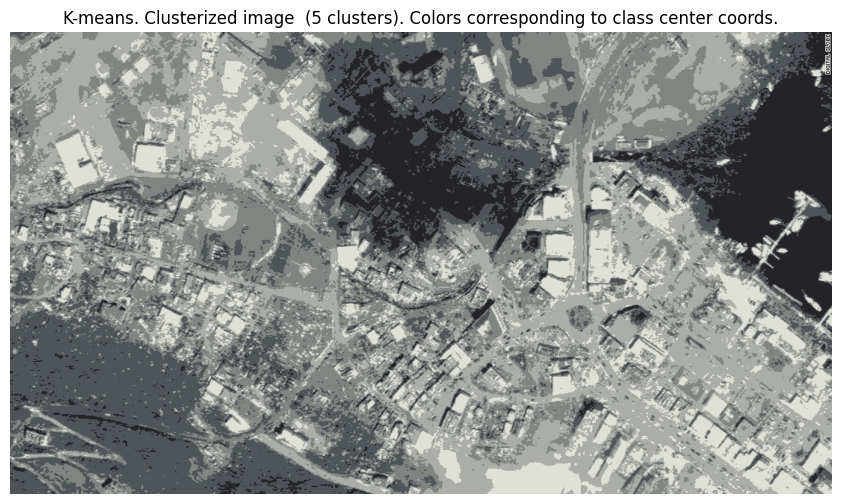

In [3]:
print('Compactness:',ret)
center=np.uint8(center)
print('Cluster Centers:\n',center)

print('label matrix dimensions:', lab.shape)

print('First elements of the label matrix (flattened):\n',lab.flatten()[0:5])

res=center[lab.flatten()]; 


res2=res.reshape((img.shape));#
print('final image dims:',res2.shape)

plt.figure(figsize=(12,6))
plt.imshow(res2)
plt.axis('off')
plt.title("K-means. Clusterized image  (5 clusters). Colors corresponding to class center coords.");

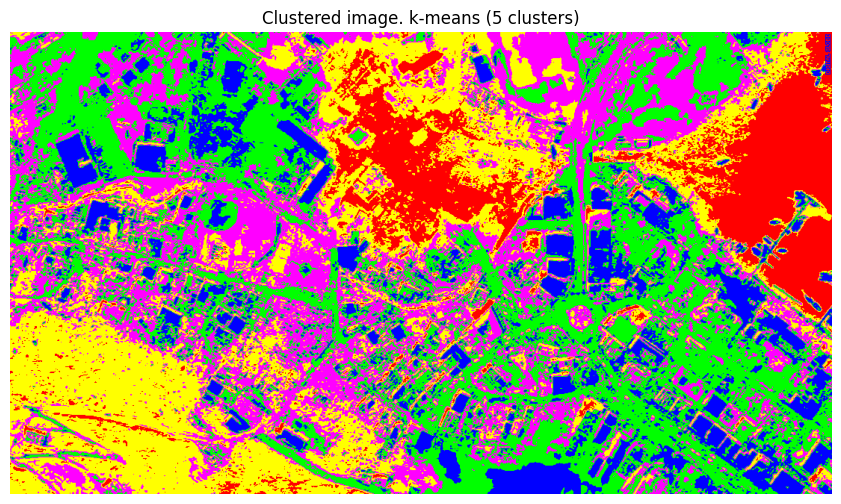

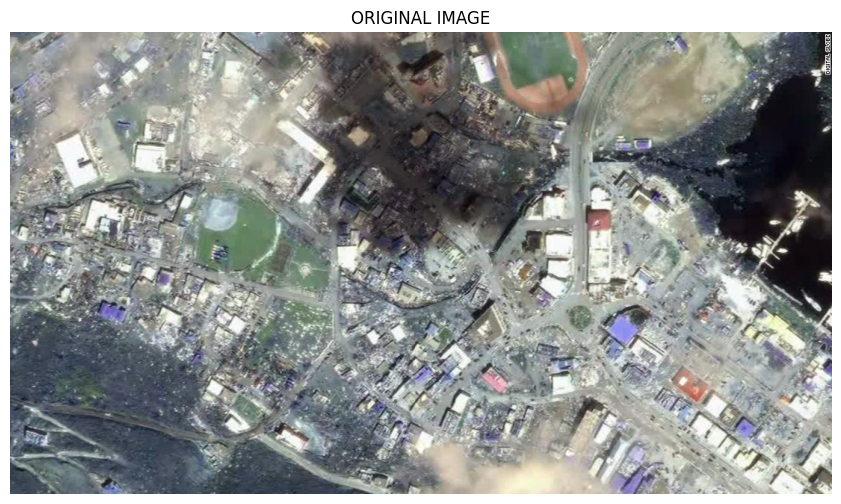

In [4]:
colores=np.array([[255, 0, 0],[0, 255, 0],[0, 0, 255],[255, 0, 255],[255,255,0]])
res3=colores[lab.flatten()] 
res3=res3.reshape((img.shape))
plt.figure(figsize=(12,6))
plt.imshow(res3)
plt.title("Clustered image. k-means (5 clusters)")
plt.axis('off')
plt.figure(figsize=(12,6))
plt.imshow(img)
plt.title("ORIGINAL IMAGE")
plt.axis('off');

In [6]:
K = range(1,11)
inert = {}
for k in K: 
  ret,lab,center = cv2.kmeans(imgCL, k, None, crit, 10, cv2.KMEANS_RANDOM_CENTERS)
  inert[k] = ret

print(inert)

{1: 6376496490.82551, 2: 2073025690.568339, 3: 1120813235.3818104, 4: 708793962.4697868, 5: 485080571.29978424, 6: 345609562.7293288, 7: 277249155.2341302, 8: 233131616.30079025, 9: 201793724.90164477, 10: 185403664.91395354}


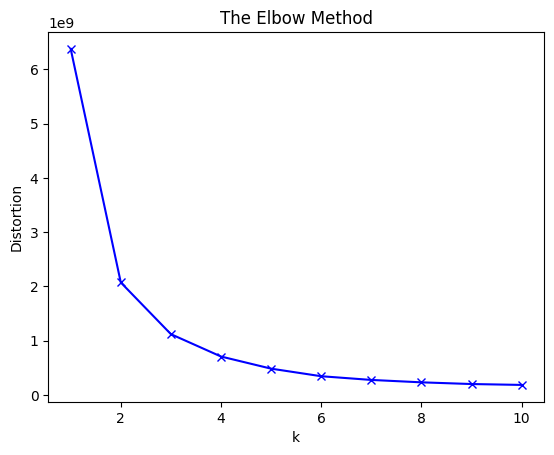

In [7]:
plt.plot(inert.keys(), inert.values(), 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method')
plt.show()